In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [13]:
df = pd.read_csv(r'C:/customer purchase analysis/shopping_trends.csv')

In [15]:
print(df.info())  
print(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [16]:
df.columns = df.columns.str.strip()

In [17]:
df.dropna(inplace=True)

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df['Age'] = df['Age'].astype(int)
df['Purchase Amount (USD)'] = df['Purchase Amount (USD)'].astype(float)
df['Review Rating'] = df['Review Rating'].astype(float)  # If rating is numeric

In [20]:
print(df.columns)

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')


In [21]:
df['Discount Applied'] = pd.to_numeric(df['Discount Applied'], errors='coerce').fillna(0)


df['Purchase Amount (USD)'] = pd.to_numeric(df['Purchase Amount (USD)'], errors='coerce')


df['Discounted Price'] = df['Purchase Amount (USD)'] * (1 - df['Discount Applied'] / 100)

print(df[['Purchase Amount (USD)', 'Discount Applied', 'Discounted Price']].head())


   Purchase Amount (USD)  Discount Applied  Discounted Price
0                   53.0               0.0              53.0
1                   64.0               0.0              64.0
2                   73.0               0.0              73.0
3                   90.0               0.0              90.0
4                   49.0               0.0              49.0


In [22]:
print(df.describe())

       Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000    44.068462              59.764359       3.749949   
std    1125.977353    15.207589              23.685392       0.716223   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.700000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Discount Applied  Previous Purchases  Discounted Price  
count            3900.0         3900.000000       3900.000000  
mean                0.0           25.351538         59.764359  
std                 0.0           14.447125         23.685392  
min                 0.0            1.000000         20.000000  
25%                 0.

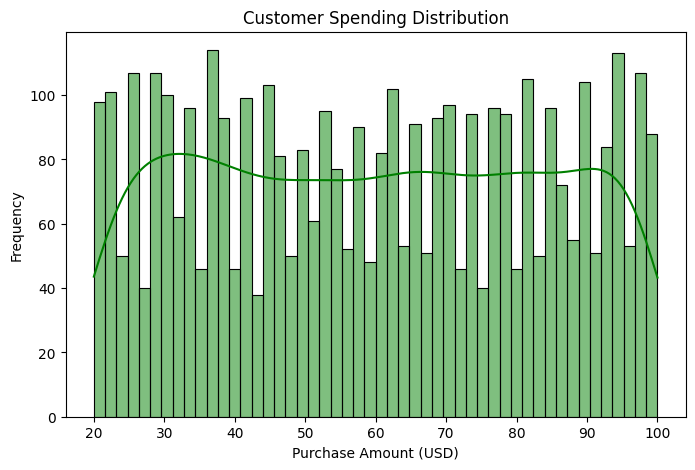

In [35]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Purchase Amount (USD)'], bins=50, kde=True, color='Green')
plt.title("Customer Spending Distribution")
plt.xlabel("Purchase Amount (USD)")
plt.ylabel("Frequency")
plt.show()

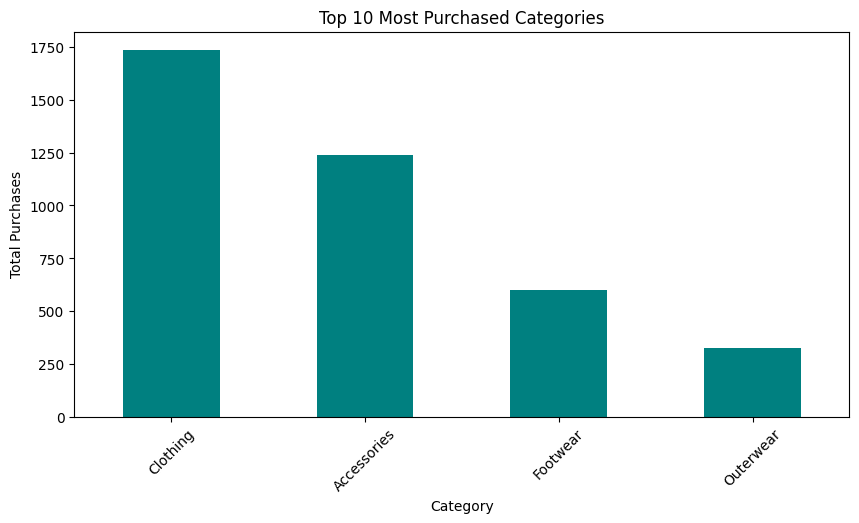

In [24]:
top_categories = df['Category'].value_counts().nlargest(10)
top_categories.plot(kind='bar', figsize=(10, 5), color='teal')
plt.title("Top 10 Most Purchased Categories")
plt.ylabel("Total Purchases")
plt.xticks(rotation=45)
plt.show()

In [25]:
customer_spending = df.groupby("Customer ID")["Purchase Amount (USD)"].sum().reset_index()

In [26]:
scaler = StandardScaler()
customer_spending_scaled = scaler.fit_transform(customer_spending[['Purchase Amount (USD)']])

In [27]:
kmeans = KMeans(n_clusters=3, random_state=42)
customer_spending['Cluster'] = kmeans.fit_predict(customer_spending_scaled)

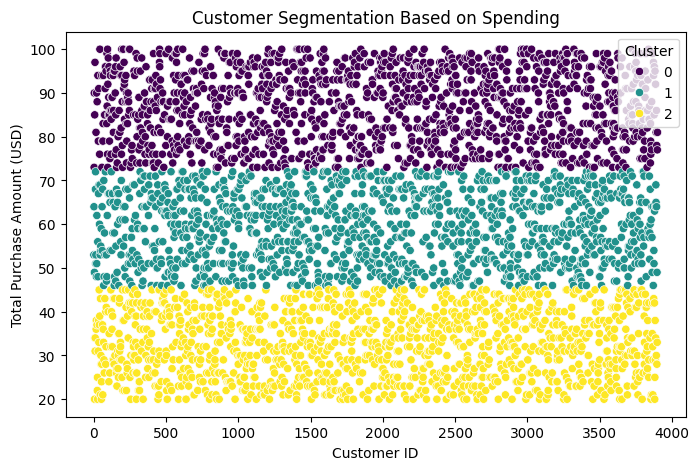

In [28]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=customer_spending['Customer ID'], y=customer_spending['Purchase Amount (USD)'], hue=customer_spending['Cluster'], palette='viridis')
plt.title("Customer Segmentation Based on Spending")
plt.xlabel("Customer ID")
plt.ylabel("Total Purchase Amount (USD)")
plt.show()

In [29]:
top_customers = df.groupby("Customer ID")["Purchase Amount (USD)"].sum().nlargest(10)
print("Top 10 Most Valuable Customers:")
print(top_customers)

Top 10 Most Valuable Customers:
Customer ID
43     100.0
96     100.0
194    100.0
205    100.0
244    100.0
249    100.0
456    100.0
519    100.0
582    100.0
616    100.0
Name: Purchase Amount (USD), dtype: float64


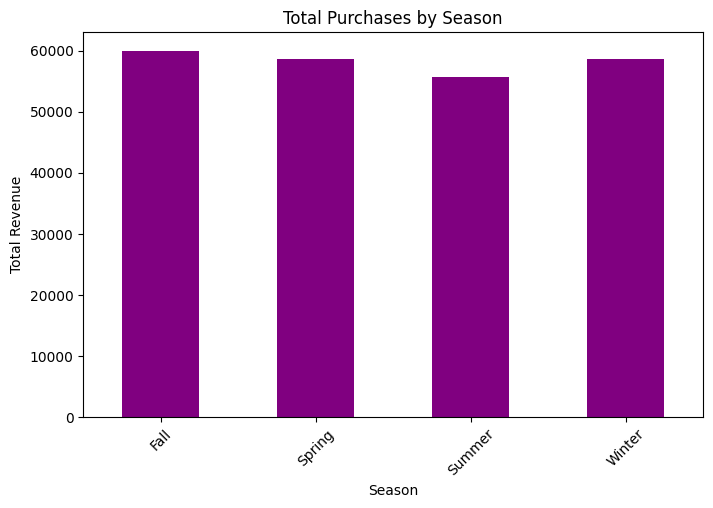

In [30]:
season_sales = df.groupby('Season')['Purchase Amount (USD)'].sum()
season_sales.plot(kind='bar', figsize=(8,5), color='purple')
plt.title("Total Purchases by Season")
plt.xlabel("Season")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()


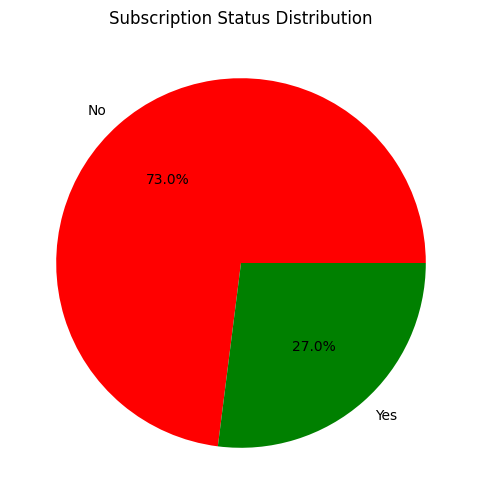

In [32]:
subscription_counts = df['Subscription Status'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(subscription_counts, labels=subscription_counts.index, autopct='%1.1f%%', colors=['red', 'Green'])
plt.title("Subscription Status Distribution")
plt.show()


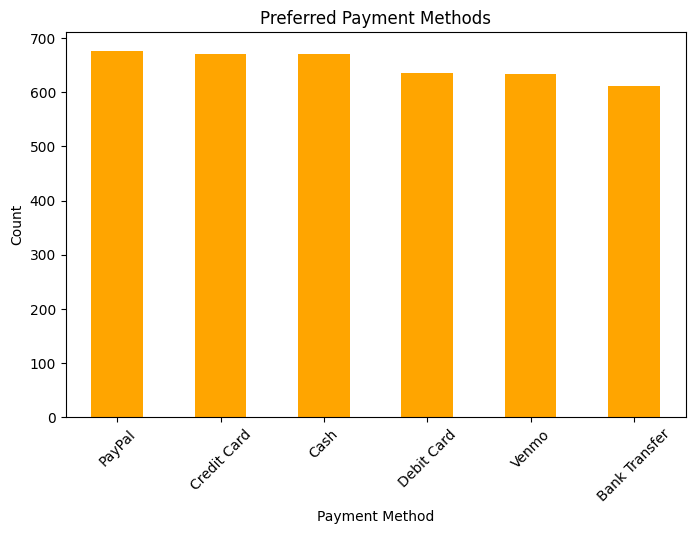

In [36]:
payment_counts = df['Preferred Payment Method'].value_counts()
payment_counts.plot(kind='bar', figsize=(8,5), color='orange')
plt.title("Preferred Payment Methods")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()